# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
! pip install GPy==1.9.9

     |████████████████████████████████| 995 kB 7.9 MB/s 
     |████████████████████████████████| 71 kB 9.2 MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2627225 sha256=fd96ad27cc69edbcdb18beee4627137c687ecda5a6350346cba8839355e7b078
  Stored in directory: /root/.cache/pip/wheels/e4/05/38/b84c6bec7ea9dc623cdbdb6203b55b3abe7a7020a992f2064c
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=9f3dca32b184c8cd9e09270d3eb38fa0fecbce6302dd96b1a6a05f72af78ef1d
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
y = np.array(data.values)
X = np.array(data.index)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [8]:
### BEGIN SOLUTION (do not delete this comment!)

scaler = StandardScaler()

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

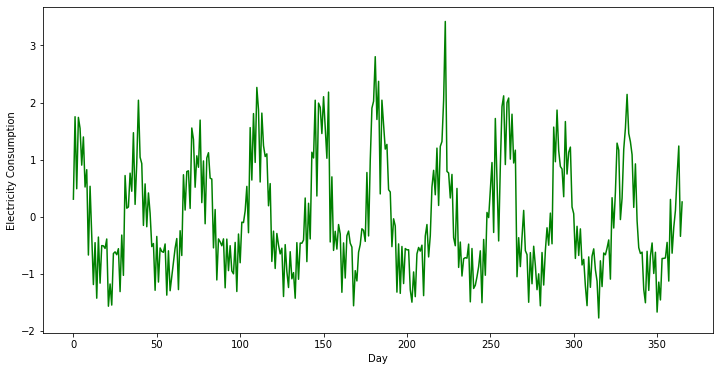

In [9]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize = (12,6))  
plt.plot(X, np.vstack((y_train, y_test)), color = 'g')
plt.xlabel('Day')
plt.ylabel('Electricity Consumption')
plt.show()
    
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

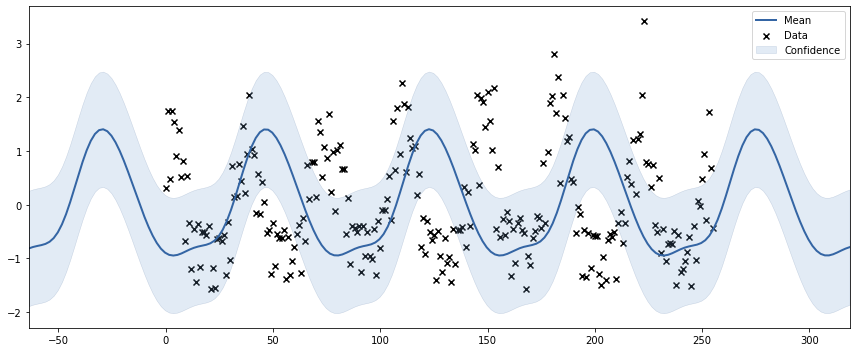

In [10]:
### BEGIN SOLUTION (do not delete this comment!)
import GPy as GPy

k_rbf = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=100)
k_stdp = GPy.kern.StdPeriodic(input_dim=1, variance=0.1)
k_white = GPy.kern.White(input_dim = 1)

kernel = k_rbf*k_white + k_stdp 

model = GPy.models.GPRegression(X_train, y_train, kernel)

model.optimize()

model.plot(figsize=(12, 5))

plt.show()





### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

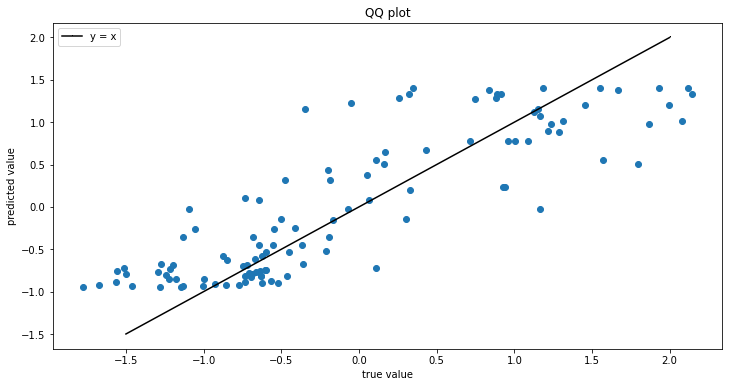

In [11]:

### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(12, 6))

y_pred = model.predict(X_test)[0].reshape(-1)

plt.scatter(y_test, y_pred)

plt.plot([-1.5, 2], [-1.5, 2], 'k-,', label='y = x')

plt.xlabel('true value')
plt.ylabel('predicted value')
plt.title('QQ plot')

plt.legend(loc='upper left')
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [12]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred).round(2))

### END SOLUTION (do not delete this comment!)

0.72


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████| 30/30 [01:42<00:00,  3.43s/it]


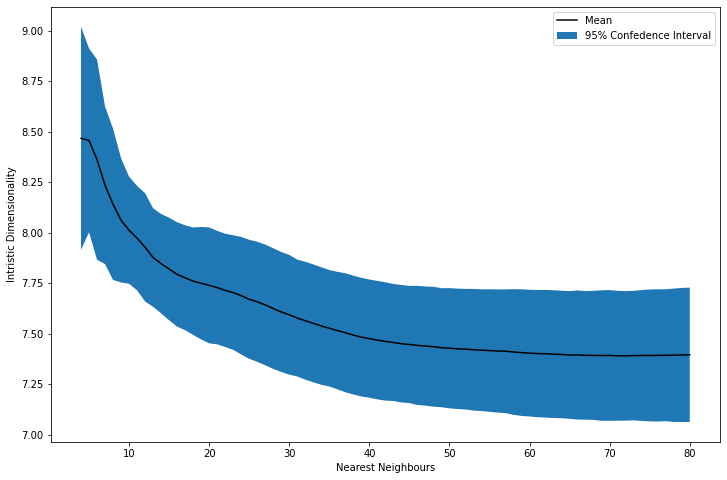

In [14]:
### BEGIN SOLUTION (do not delete this comment!)

"""
Implementation of 'Maximum Likelihood Estimation of Intrinsic Dimension' by Elizaveta Levina and Peter J. Bickel
how to use
----------
The goal is to estimate intrinsic dimensionality of data, the estimation of dimensionality is scale dependent
(depending on how much you zoom into the data distribution you can find different dimesionality), so they
propose to average it over different scales, the interval of the scales [k1, k2] are the only parameters of the algorithm.
This code also provides a way to repeat the estimation with bootstrapping to estimate uncertainty.
Here is one example with swiss roll :
from sklearn.datasets import make_swiss_roll
X, _ = make_swiss_roll(1000)
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, 
                             mode='bootstrap', 
                             nb_iter=500, # nb_iter for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
# the shape of intdim_k_repeated is (nb_iter, size_of_interval) where 
# nb_iter is number of bootstrap iterations (here 500) and size_of_interval
# is (k2 - k1 + 1).
# Plotting the histogram of intrinsic dimensionality estimations repeated over
# nb_iter experiments
plt.hist(intdim_k_repeated.mean(axis=1))
"""
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

k1 = 4 # start of interval
k2 = 80 # end of interval
intd_k_r = repeated(intrinsic_dim_scale_interval,
                             data, 
                             mode='bootstrap', 
                             nb_iter=30, # iterations for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)
intd_k_r = np.array(intd_k_r)

mean = np.mean(intd_k_r, axis=0)
std = np.std(intd_k_r, axis=0)

plt.figure(figsize=(12, 8))
plt.plot(list(range(k1, k2 + 1)), mean, color='black', label='Mean')
plt.fill_between(list(range(k1, k2 + 1)), mean - 1.95 * std, mean + 1.95 * std, label='95% Confedence Interval')
plt.xlabel("Nearest Neighbours")
plt.ylabel("Intristic Dimensionality")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [15]:
data.shape


(1797, 64)

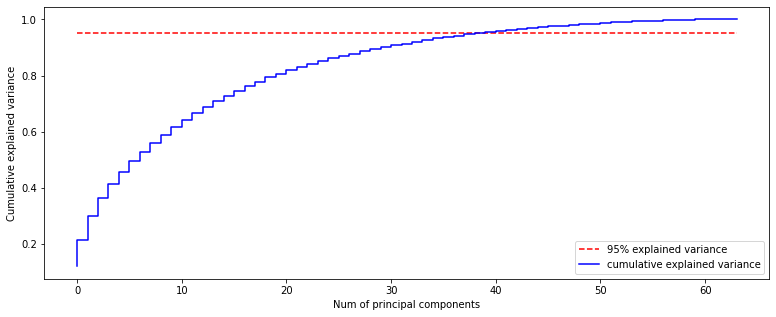

In [16]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA

components = data.shape[1] 
pca = PCA(n_components = components)
pca.fit(data)

n_components_list = list(range(components))

plt.figure(figsize=(13, 5))
plt.plot(n_components_list, list(np.full(shape=(len(n_components_list), 1), fill_value=0.95)), color = 'r' ,label='95% explained variance', linestyle='--')
plt.step(n_components_list, np.cumsum(pca.explained_variance_ratio_), color = 'b', label="cumulative explained variance")
plt.xlabel("Num of principal components")
plt.ylabel("Cumulative explained variance")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

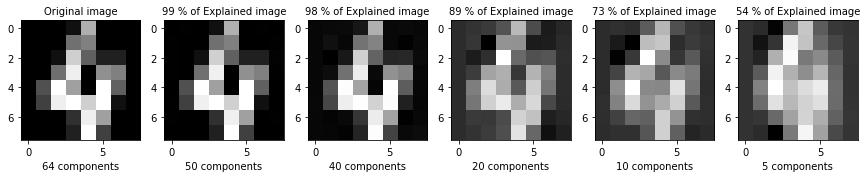

In [17]:
### BEGIN SOLUTION (do not delete this comment!)

import matplotlib.cm as cm

def plot_images(image, num_of_components, data):
    fig, axes = plt.subplots(1, len(num_of_components), figsize=(15, 5))
    
    for i, ax in enumerate(axes.flatten()):
        pca = PCA(n_components=num_of_components[i])
        pca.fit(data)
        expl_var = np.sum(pca.explained_variance_ratio_)
        proj = pca.transform(image)
        reconstr_image = pca.inverse_transform(proj)
        ax.imshow(reconstr_image.reshape(8, 8), cmap=cm.gray, interpolation = 'Nearest')
        ax.set_xlabel("{0} components".format(num_of_components[i]))
        if num_of_components[i] != 64:
            ax.set_title("{0} % of Explained image".format(int(expl_var * 100)), fontsize=10)
        else:
            ax.set_title("Original image", fontsize=10)
    
num_of_components = [64, 50, 40, 20, 10, 5]
data = np.reshape(dg.images, (len(dg.images), -1))
plot_images(data[4].reshape(1, -1), num_of_components, data)

### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [18]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [19]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

logr = LogisticRegression(n_jobs = -1)
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scores=list()

num_of_components = 7
np.random.seed(0)

iso = Isomap(n_neighbors = 5, n_components = num_of_components)
pca = PCA(n_components = num_of_components, whiten=True)
ica = FastICA(n_components = num_of_components, whiten=True)

iso_transformed = iso.fit_transform(data)
pca_transformed = pca.fit_transform(data)
ica_transformed = ica.fit_transform(data)

target = dg.target

iso_scores = cross_val_score(estimator=logr, X = iso_transformed, y = target, cv = rkf)
pca_scores = cross_val_score(estimator=logr, X = pca_transformed, y = target, cv = rkf)
ica_scores = cross_val_score(estimator=logr, X = ica_transformed, y = target, cv = rkf)


print("PCA: ", pca_scores.mean())
print("FastICA: ", ica_scores.mean())
print("Isomap: ", iso_scores.mean())

### END SOLUTION (do not delete this comment!)


 /usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning:The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
 /usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


PCA:  0.8866656349943259
FastICA:  0.7425296605798
Isomap:  0.9758846590322913


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [20]:
### BEGIN SOLUTION (do not delete this comment!)

from scipy.stats import ttest_ind

value, pvalue = ttest_ind(pca_scores, ica_scores)

if ((pvalue < 0.005) and (value > 0)):
    print("T test with alternative hypothesis that Isomap has greater accuracy than PCA Statistic {:.2f} p_value: {}".format(value, pvalue))

value, pvalue = ttest_ind(iso_scores, pca_scores)

if ((pvalue < 0.005) and (value > 0)):
    print("T test with alternative hypothesis that Isomap has greater accuracy than FastICA Statistic {:.2f} p_value: {}".format(value, pvalue))    


### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA Statistic 15.01 p_value: 6.46074932167126e-15
T test with alternative hypothesis that Isomap has greater accuracy than FastICA Statistic 17.64 p_value: 1.0596109636535285e-16


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

Isomap uses non-linear transformation while PCA and ICA use non linear transformations based on non equal and equal weights via eigen values respectively. As the data itself is non linear so my guess is this is why Isomap performs better.

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [21]:
import numpy as np

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

  0%|          | 0/15 [00:00<?, ?it/s]

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

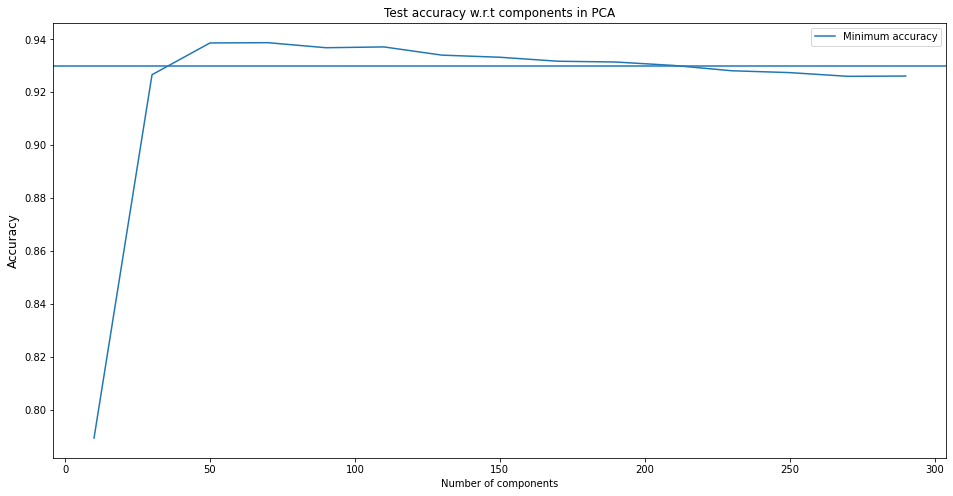

Test accuracy  0.938


In [23]:
### BEGIN SOLUTION (do not delete this comment!)
from tqdm import tqdm_notebook

test_scores = []
x_train_sample = x_train
x_test_sample = x_test

for num_components in tqdm_notebook(range(10, 300, 20)):
    
    pca = PCA(n_components=num_components)
    x_train_t = pca.fit_transform(x_train_sample)
    x_test_t = pca.transform(x_test_sample)
    clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
    clf.fit(x_train_t, y_train)
    test_s = clf.score(x_test_t, y_test)
    test_scores.append(test_s)

    fig = plt.figure(figsize=(16, 8))

plt.plot(range(10, 300, 20), test_scores)
plt.title("Test accuracy w.r.t components in PCA")
plt.xlabel("Number of components")
plt.ylabel("Accuracy", size = 12)
plt.axhline(y = 0.93, linestyle='-', label = 'Minimum accuracy')
plt.legend()
plt.show()

# from the graph we can see that the accuracy and thus the intrensic dimention peak around 70

pca = PCA(n_components=70)
x_tr = pca.fit_transform(x_train)
x_te = pca.transform(x_test)
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
clf.fit(x_tr, y_train)
test_score = clf.score(x_te, y_test)
print ("Test accuracy ", test_score)


### END SOLUTION (do not delete this comment!)

## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [24]:
import numpy as np

True number of clusters is 15


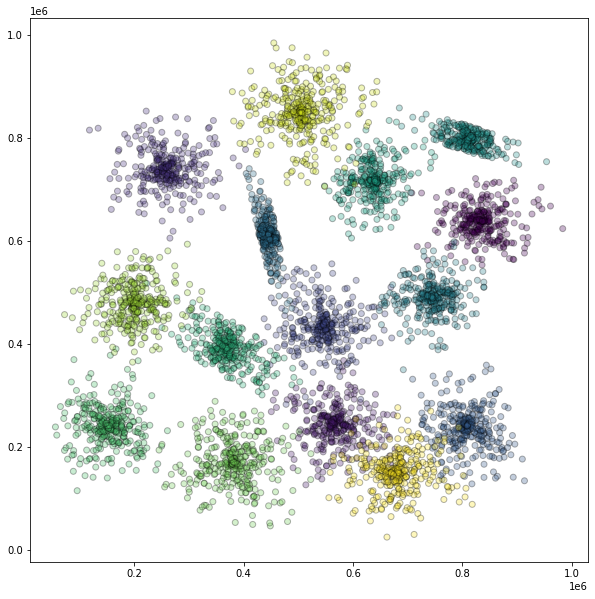

In [25]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

def _silhouette_score(estimator, X, y):
    prediction = estimator.fit_predict(X)
    score = silhouette_score(X, prediction)
    return score

X, y = points, labels

best_silh = {}
best_ami = {}

##KMean Grid Search
params = {"n_init":[5, 10, 20]}
best_clust = GridSearchCV(KMeans(n_clusters=15), param_grid=params, scoring='adjusted_mutual_info_score', n_jobs=-1)
best_clust.fit(X, y)
best_mod_adj = best_clust.best_params_
best_ami['KMeans'] = best_mod_adj
print(best_clust.best_score_)

best_clust = GridSearchCV(KMeans(n_clusters=15), param_grid=params, scoring=_silhouette_score, n_jobs=-1)
best_clust.fit(X, y)
best_mod_silh = best_clust.best_params_
best_silh['KMeans'] = best_mod_silh
print(best_clust.best_score_)


##GaussianMixture 
params = {'n_init':[5, 10, 20]}
best_clust = GridSearchCV(GaussianMixture(n_components=15), param_grid=params, scoring='adjusted_mutual_info_score', n_jobs=-1)
best_clust.fit(X, y)
best_mod_adj = best_clust.best_params_
best_ami['GaussianMixture'] = best_mod_adj
print(best_clust.best_score_)

best_clust = GridSearchCV(GaussianMixture(n_components=15), param_grid=params, scoring=_silhouette_score, n_jobs=-1)
best_clust.fit(X, y)
best_mod_silh = best_clust.best_params_
best_silh['GaussianMixture'] = best_mod_silh
print(best_clust.best_score_)


#Agglomerative Clustering
params = {'linkage' :['ward']}
best_clust = GridSearchCV(AgglomerativeClustering(n_clusters=15), param_grid=params, scoring='adjusted_mutual_info_score', n_jobs=-1)
best_clust.fit(X, y)
best_mod_adj = best_clust.best_params_
best_ami['AgglomerativeClustering'] = best_mod_adj
print(best_clust.best_score_)

best_clust = GridSearchCV(AgglomerativeClustering(n_clusters=15), param_grid=params, scoring=_silhouette_score, n_jobs=-1)
best_clust.fit(X, y)
best_mod_silh = best_clust.best_params_
best_silh['AgglomerativeClustering'] = best_mod_silh
print(best_clust.best_score_)


##Birch
params = {'threshold':[0.2, 0.5], 'branching_factor':[20, 30, 50, 60, 80]}
best_clust = GridSearchCV(Birch(n_clusters=15), param_grid=params, scoring='adjusted_mutual_info_score', n_jobs=-1)
best_clust.fit(X, y)
best_mod_adj = best_clust.best_params_
best_ami['Birch'] = best_mod_adj
print(best_clust.best_score_)

best_clust = GridSearchCV(Birch(n_clusters=15), param_grid=params, scoring=_silhouette_score, n_jobs=-1)
best_clust.fit(X, y)
best_mod_silh = best_clust.best_params_
best_silh['Birch'] = best_mod_silh
print(best_clust.best_score_)

print(best_silh, best_ami)

### END SOLUTION (do not delete this comment!)

0.7349017929361119
0.42572836241939516
0.8055126632709723
0.2749393980139746


 /usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning:One or more of the test scores are non-finite: [nan]


nan
0.36068562176878455
0.7642810790441924
0.36068562176878455
{'KMeans': {'n_init': 20}, 'GaussianMixture': {'n_init': 10}, 'AgglomerativeClustering': {'linkage': 'ward'}, 'Birch': {'branching_factor': 20, 'threshold': 0.2}} {'KMeans': {'n_init': 5}, 'GaussianMixture': {'n_init': 5}, 'AgglomerativeClustering': {'linkage': 'ward'}, 'Birch': {'branching_factor': 20, 'threshold': 0.2}}


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

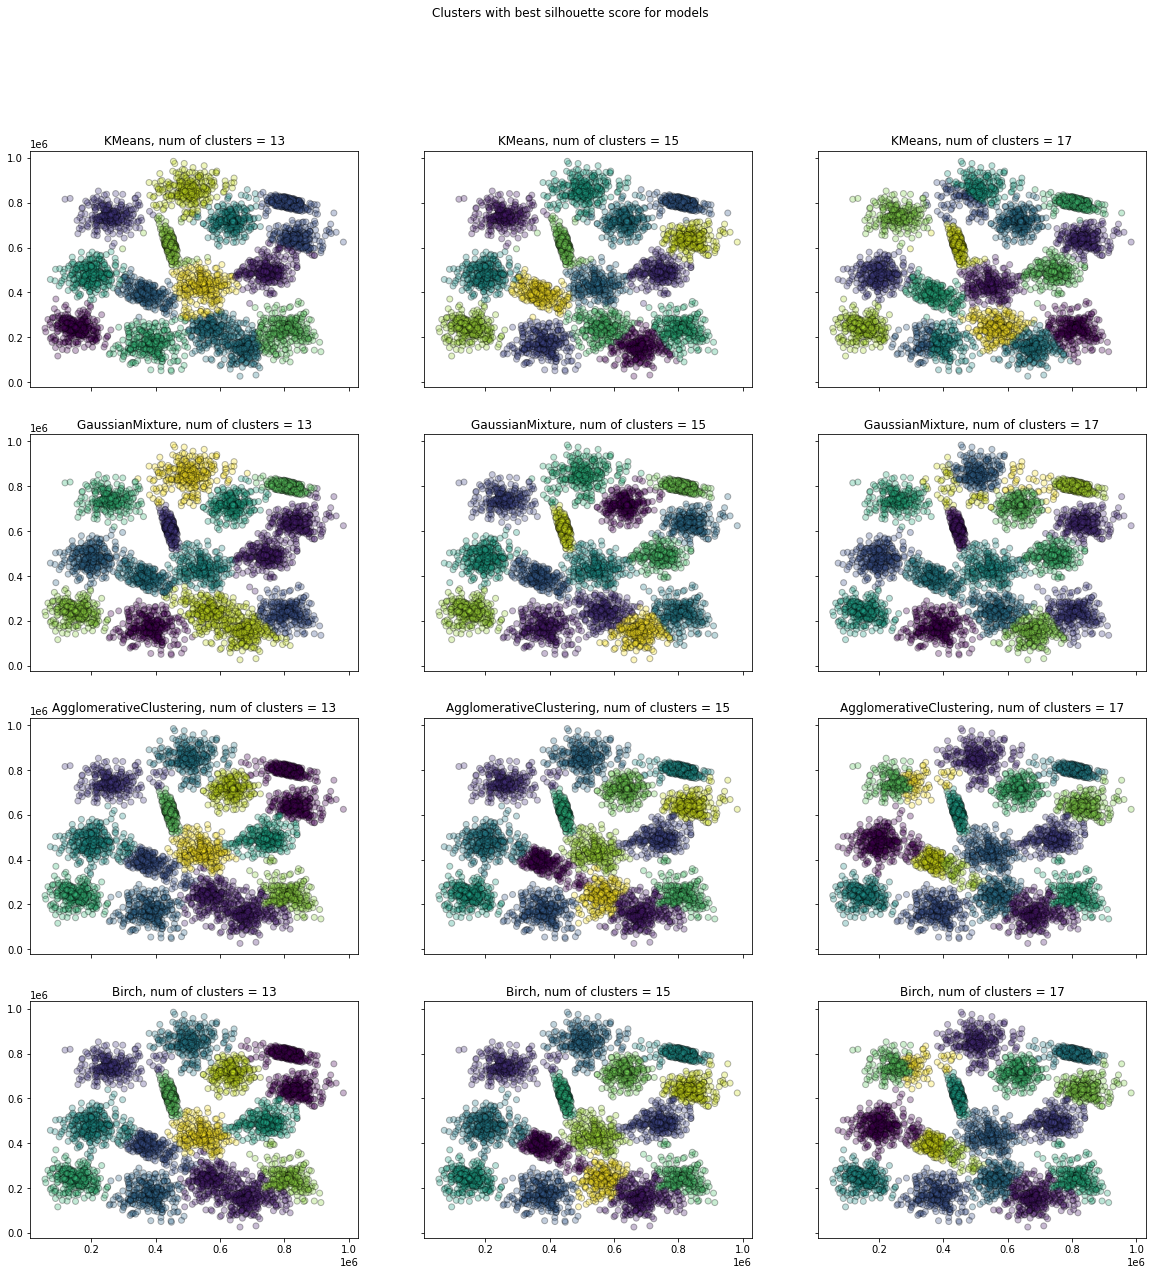

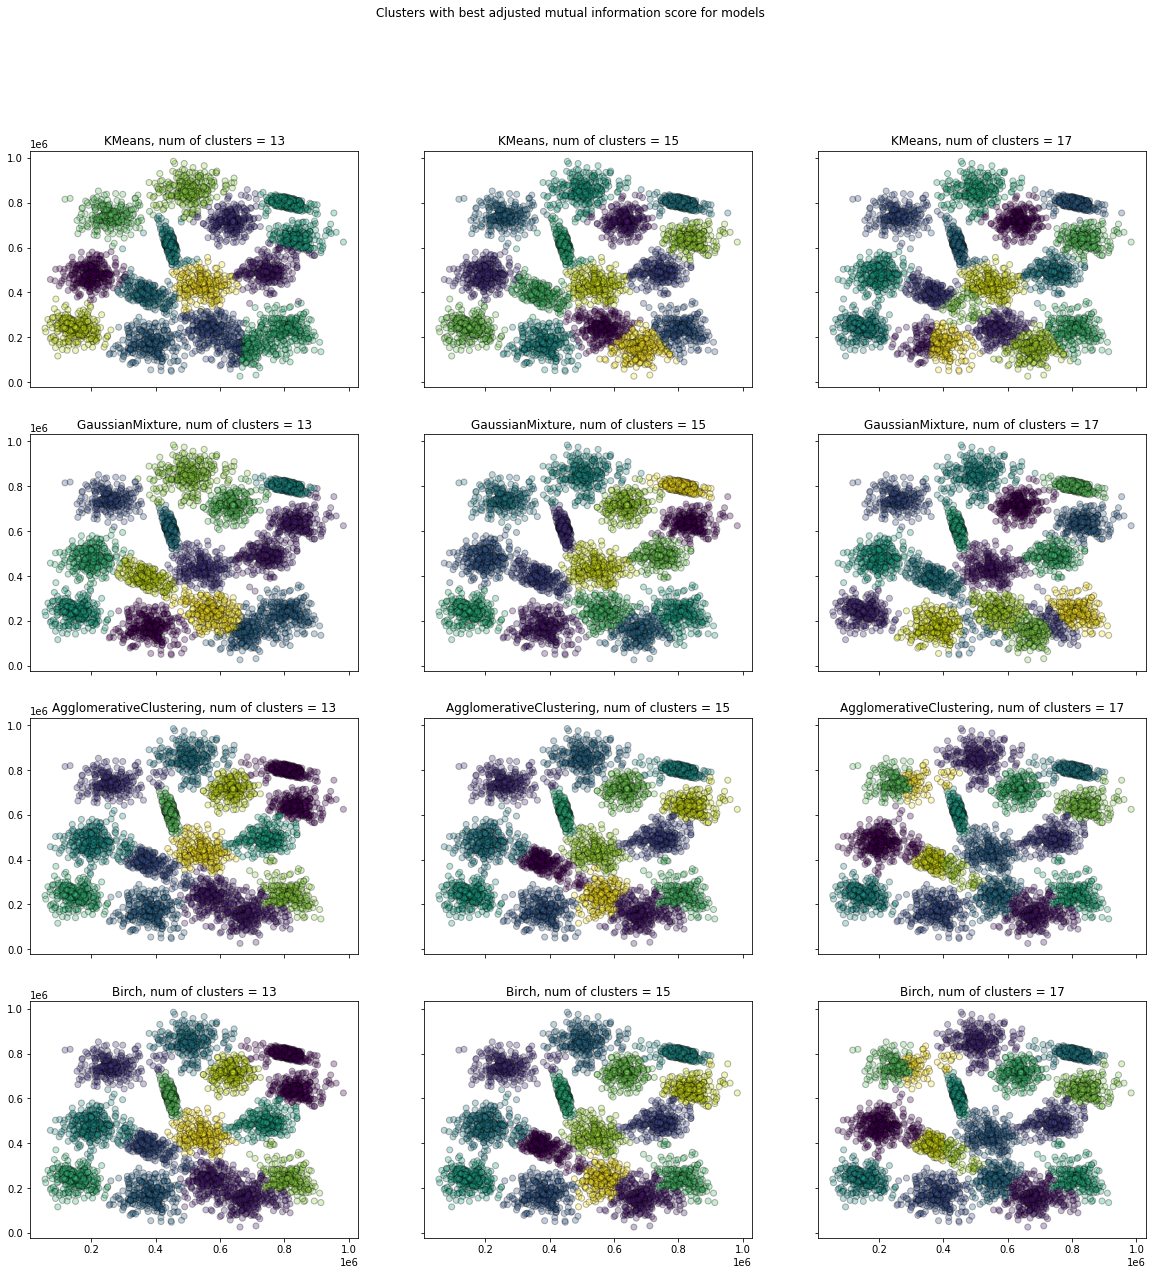

In [28]:
## BEGIN SOLUTION (do not delete this comment!)

from sklearn.metrics import adjusted_mutual_info_score


clust_algs = [KMeans, GaussianMixture, AgglomerativeClustering, Birch]

clust_algs_names = ["KMeans", "GaussianMixture", "AgglomerativeClustering", "Birch"]
number_of_clusters = [13, 15, 17]

f_silh, axes_silh = plt.subplots(len(clust_algs), len(number_of_clusters), figsize=(20, 20), sharex='col', sharey='row')
f_adj, axes_adj = plt.subplots(len(clust_algs), len(number_of_clusters), figsize=(20, 20), sharex='col', sharey='row')

f_silh.suptitle("Clusters with best silhouette score for models")
f_adj.suptitle("Clusters with best adjusted mutual information score for models")

X, y = points, labels

silh_score = np.zeros((len(clust_algs), len(number_of_clusters)))
adj_score = np.zeros((len(clust_algs), len(number_of_clusters)))

for i, clust in enumerate(clust_algs):
    for j, num_clust in enumerate(number_of_clusters):
        
        if clust == GaussianMixture:
            silh_params = best_silh[clust_algs_names[i]].copy()
            silh_params.update({'n_components':num_clust})
            
            adj_params = best_ami[clust_algs_names[i]].copy()
            adj_params.update({'n_components':num_clust})
            
            prediction_silh = clust().set_params(**silh_params).fit_predict(X)
            prediction_adj = clust().set_params(**adj_params).fit_predict(X)            
        else:
            
            silh_params = best_silh[clust_algs_names[i]].copy()
            silh_params.update({'n_clusters':num_clust})
            
            adj_params = best_ami[clust_algs_names[i]].copy()
            adj_params.update({'n_clusters':num_clust})

            prediction_silh = clust().set_params(**silh_params).fit_predict(X)            
            prediction_adj = clust().set_params(**adj_params).fit_predict(X)
        
        silh_score[i, j] = silhouette_score(X, prediction_silh)
        adj_score[i, j] = adjusted_mutual_info_score(y, prediction_adj)
        
        ax_silh = axes_silh.flat[i * len(number_of_clusters) + j]
        ax_silh.scatter(X[:,0], X[:,1], c=prediction_silh, alpha=0.3, edgecolor='k')
        ax_silh.set_title("{0}, num of clusters = {1}".format(clust_algs_names[i], num_clust))
        
        ax_adj = axes_adj.flat[i * len(number_of_clusters) + j]
        ax_adj.scatter(X[:,0], X[:,1], c=prediction_adj, alpha=0.3, edgecolor='k')
        ax_adj.set_title("{0}, num of clusters = {1}".format(clust_algs_names[i], num_clust))

plt.show()


### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


In [29]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.title("silhouette_score")

for i, clust_name in enumerate(clust_algs_names):
    plt.plot(number_of_clusters, silh_score[i], label=clust_name)

plt.ylabel("score")
plt.xlabel("number of clusters")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)

plt.title("adjusted_mutual_info_score")

for i, clust_name in enumerate(clust_algs_names):
    plt.plot(number_of_clusters, adj_score[i], label=clust_name)

plt.ylabel("score")
plt.xlabel("number of clusters")
plt.grid()
plt.legend()


plt.show()

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [30]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.utils import resample


cluster_ns = np.arange(10, 19, 1)
sample_number = 15
scores = np.zeros((len(cluster_ns), sample_number))

for i_cn, n_clusters in enumerate(cluster_ns):
    
    for sample_index in range(sample_number):

        true_sample = resample(points, replace=True, n_samples=points.shape[0], random_state=402)
        kmeans = KMeans(n_clusters=n_clusters)
        pred_labels = kmeans.fit_predict(true_sample)
        scores[i_cn, sample_index] = silhouette_score(true_sample, pred_labels)


### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

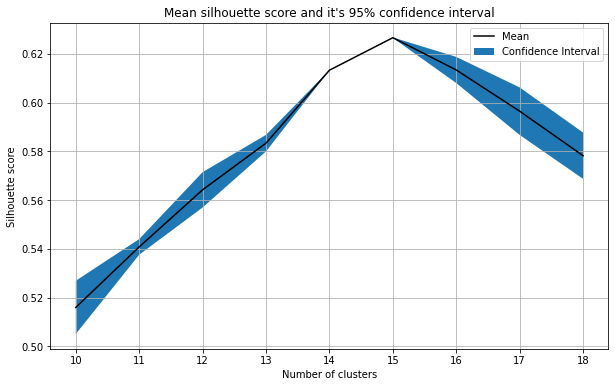

In [31]:
### BEGIN SOLUTION (do not delete this comment!)
  
mean = np.mean(scores, axis=1)
std = np.std(scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(cluster_ns, mean, color='black', label='Mean')
plt.fill_between(cluster_ns, mean - 1.95 * std, mean + 1.95 * std, label='Confidence Interval')
plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.show()

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [32]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [33]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
contamination = test_y.mean()
contamination

### END SOLUTION (do not delete this comment!)

0.01693743518838576

In [34]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models


from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

models = [IsolationForest(n_jobs=-1, random_state=42), LocalOutlierFactor(n_jobs=-1, novelty=True), OneClassSVM()]

for i in [0.1, 1, 10]:
    
    for model in models:
        
        params = model.get_params()
        contamination_ = contamination * i 

        if type(model) is OneClassSVM:
            model.set_params(nu=contamination_)
        else:
            model.set_params(contamination=contamination_)

        model.fit(train_X.values)

        pred_y = model.predict(test_X.values)

        pred_y[pred_y == 1] = 0
        pred_y[pred_y == -1] = 1

        prec = precision_score(test_y, pred_y, average='weighted')
        roc_auc = roc_auc_score(test_y, pred_y)

        print(f'{type(model).__name__}:')
        print('\tContamination:', contamination_)
        print('\tROC_AUC:', roc_auc)
        print('\tPrecision:', prec)


    # >>> your solution here <<<

### END SOLUTION (do not delete this comment!)

IsolationForest:
	Contamination: 0.001693743518838576
	ROC_AUC: 0.5408163265306123
	Precision: 0.9846874989904733
LocalOutlierFactor:
	Contamination: 0.001693743518838576
	ROC_AUC: 0.49912095639943743
	Precision: 0.9663831791898105
OneClassSVM:
	Contamination: 0.001693743518838576
	ROC_AUC: 0.49859353023909986
	Precision: 0.9663658349413303
IsolationForest:
	Contamination: 0.01693743518838576
	ROC_AUC: 0.7723456471196073
	Precision: 0.9856311437526459
LocalOutlierFactor:
	Contamination: 0.01693743518838576
	ROC_AUC: 0.49965555842590204
	Precision: 0.9666781503138666
OneClassSVM:
	Contamination: 0.01693743518838576
	ROC_AUC: 0.48874824191279886
	Precision: 0.9660353234981575
IsolationForest:
	Contamination: 0.16937435188385758
	ROC_AUC: 0.8723269898676771
	Precision: 0.9825781498486302
LocalOutlierFactor:
	Contamination: 0.16937435188385758
	ROC_AUC: 0.505690461838744
	Precision: 0.9669426099352191
OneClassSVM:
	Contamination: 0.16937435188385758
	ROC_AUC: 0.5102614885616694
	Precision:

### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [35]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_scores = []

clf = RandomForestClassifier()

for train_index, test_index in skf.split(test_X, test_y):
   # >>> your solution here <<<

    clf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    y_pred = clf.predict(test_X.iloc[test_index])
    
    roc_auc = roc_auc_score(test_y.iloc[test_index], y_pred)
    roc_auc_scores.append(roc_auc)
    
    pr = precision_score(test_y.iloc[test_index], y_pred)
    pr_scores.append(pr)

print('ROC_AUC mean: {} std: {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean: {} std: {}'.format(np.mean(pr_scores), np.std(pr_scores)))


    
### END SOLUTION (do not delete this comment!)

ROC_AUC mean: 0.9092976278724982 std: 0.053668568921155686
Precision mean: 0.9266666666666665 std: 0.11718930554164629


Try to enhance the classifier performance using Anomaly detection methods

In [36]:
### BEGIN SOLUTION (do not delete this comment!)
skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

anomaly_d = IsolationForest()
clf = RandomForestClassifier()

for train_index, test_index in skf.split(test_X, test_y):
    anomaly_d.fit(test_X.iloc[train_index])
    anomoly_pred = anomaly_d.predict(test_X.iloc[test_index])
    
    clf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    clf_pred = clf.predict(test_X.iloc[test_index])
    
    final_pred = np.logical_and(anomoly_pred, clf_pred)
    
    roc_auc = roc_auc_score(test_y.iloc[test_index], final_pred)
    roc_auc_scores.append(roc_auc)
    
    pr = precision_score(test_y.iloc[test_index], final_pred)
    pr_score.append(pr)
    
print('ROC_AUC mean: {} std: {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean: {} std: {}'.format(np.mean(pr_score), np.std(pr_score)))
### END SOLUTION (do not delete this comment!)

ROC_AUC mean: 0.9094730664689894 std: 0.053629272088480166
Precision mean: 0.9400000000000001 std: 0.09165151389911678


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*
I used Random Forest Classifier in the first place which works with deep tree classification and so not much improvement is seen with anomaly detection. For a shallow classifier I suppose much more clear improvements can be seen
*END SOLUTION (do not delete this comment!)*